In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

data = pandas.read_csv('20250212_EC_decays.txt')
data.describe()

,Decay Times in Microseconds
count,1257.000000
mean,3.421448
std,3.931721
min,0.319997
25%,0.960001
50%,1.880002
75%,4.120004
max,20.319996


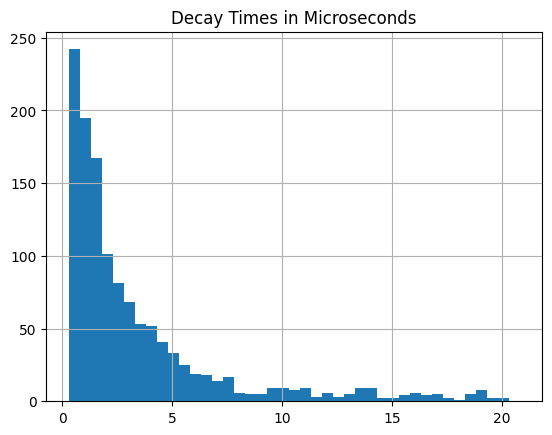

In [20]:
cropped_data = data[data['Decay Times in Microseconds'] >= 0.3]
cropped_data = cropped_data[cropped_data['Decay Times in Microseconds'] <= 20]
cropped_data.describe()
hist = cropped_data.hist(range=data_range, bins=bins)


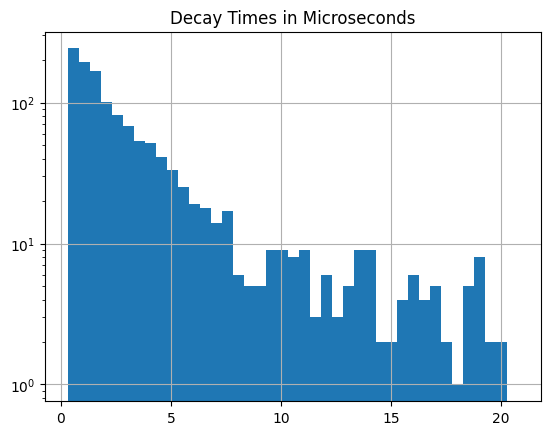

In [15]:
data_range = (0.3, max(data['Decay Times in Microseconds']))
bins = np.arange(0.3, max(data['Decay Times in Microseconds']) + 0.5, 0.5)
hist = cropped_data.hist(range=data_range, bins=bins)
hist[0][0].set_yscale('log')

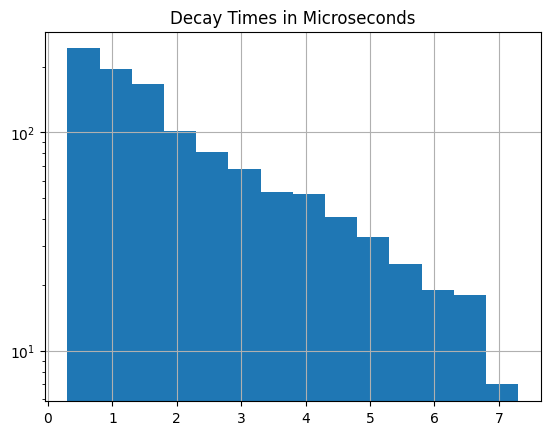

In [4]:
cropped_data_2 = cropped_data[cropped_data['Decay Times in Microseconds'] <= 7]
data_range = (0.3, max(cropped_data_2['Decay Times in Microseconds']))
bins = np.arange(0.3, max(cropped_data_2['Decay Times in Microseconds']) + 0.5, 0.5)
hist = cropped_data_2.hist(range=data_range, bins=bins)
hist[0][0].set_yscale('log')

times, bins = np.histogram(cropped_data_2, bins=bins, range=data_range)
times = np.log(times)
bins = bins[:-1]

In [ ]:
line = np.polynomial.polynomial.Polynomial.fit(bins, times, deg=1)
line=line.convert()

Polynomial([ 5.62523946, -0.47310125], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [30]:
gamma=line.convert().coef[1]
tau = -1/gamma
tau

np.float64(2.113712457958419)

In [22]:
cropped_data_2.describe()

,Decay Times in Microseconds
count,1102.000000
mean,2.161488
std,1.617221
min,0.319997
25%,0.879998
50%,1.640000
75%,3.040010
max,6.960006
